# Step 1: Data Loading and Initial Exploration

In this step, we will load the dataset into a pandas DataFrame and perform an initial exploration to understand the basic structure and contents of the data.


In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
file_path = 'data/insurance_data_sample.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.info())
print(df.isnull().sum())


         Car_id        Date Customer Name Gender  Annual Income  \
0  C_CND_000001  01/02/2022     Geraldine   Male          13500   
1  C_CND_000002  01/02/2022           Gia   Male        1480000   
2  C_CND_000003  01/02/2022        Gianna   Male        1035000   
3  C_CND_000004  01/02/2022       Giselle   Male          13500   
4  C_CND_000005  01/02/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                        Engine Transmission       Color  Price ($)  \
0  DoubleÃ‚Â Overhead Camshaft         Auto       Black      26000   
1  DoubleÃ‚Â Overhead Camshaft         Auto       Black      19000   
2 

# Step 2: Data Cleaning

In this step, we will handle missing values and outliers in the dataset to prepare it for further analysis.


## Handle Missing Values

First, we will check for missing values in the dataset and handle them.

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Confirm if there are any missing values
if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset. Handling them now...")

    # Example strategy: Drop rows with missing values
    df = df.dropna()

    # Check again for missing values
    missing_values_after = df.isnull().sum()
    print("Missing values after handling:")
    print(missing_values_after)


Missing values in each column:
Car_id                       0
Date                         0
Customer Name                1
Gender                       0
Annual Income                0
Dealer_Name                  0
Company                      0
Model                        0
Engine                       0
Transmission                 0
Color                        0
Price ($)                    0
Dealer_No                    0
Body Style                   0
Phone                        0
Amount_paid_for_insurance    0
Claim amount                 0
City                         0
dtype: int64
There are missing values in the dataset. Handling them now...
Missing values after handling:
Car_id                       0
Date                         0
Customer Name                0
Gender                       0
Annual Income                0
Dealer_Name                  0
Company                      0
Model                        0
Engine                       0
Transmission              

## Handle Missing Values

Since there are no missing values in the dataset, we can skip this step. However, if there were missing values, we could use strategies such as dropping rows/columns, filling with mean/median/mode, etc.


## Handle Outliers

We will identify and handle outliers in the numerical columns using the Interquartile Range (IQR) method.


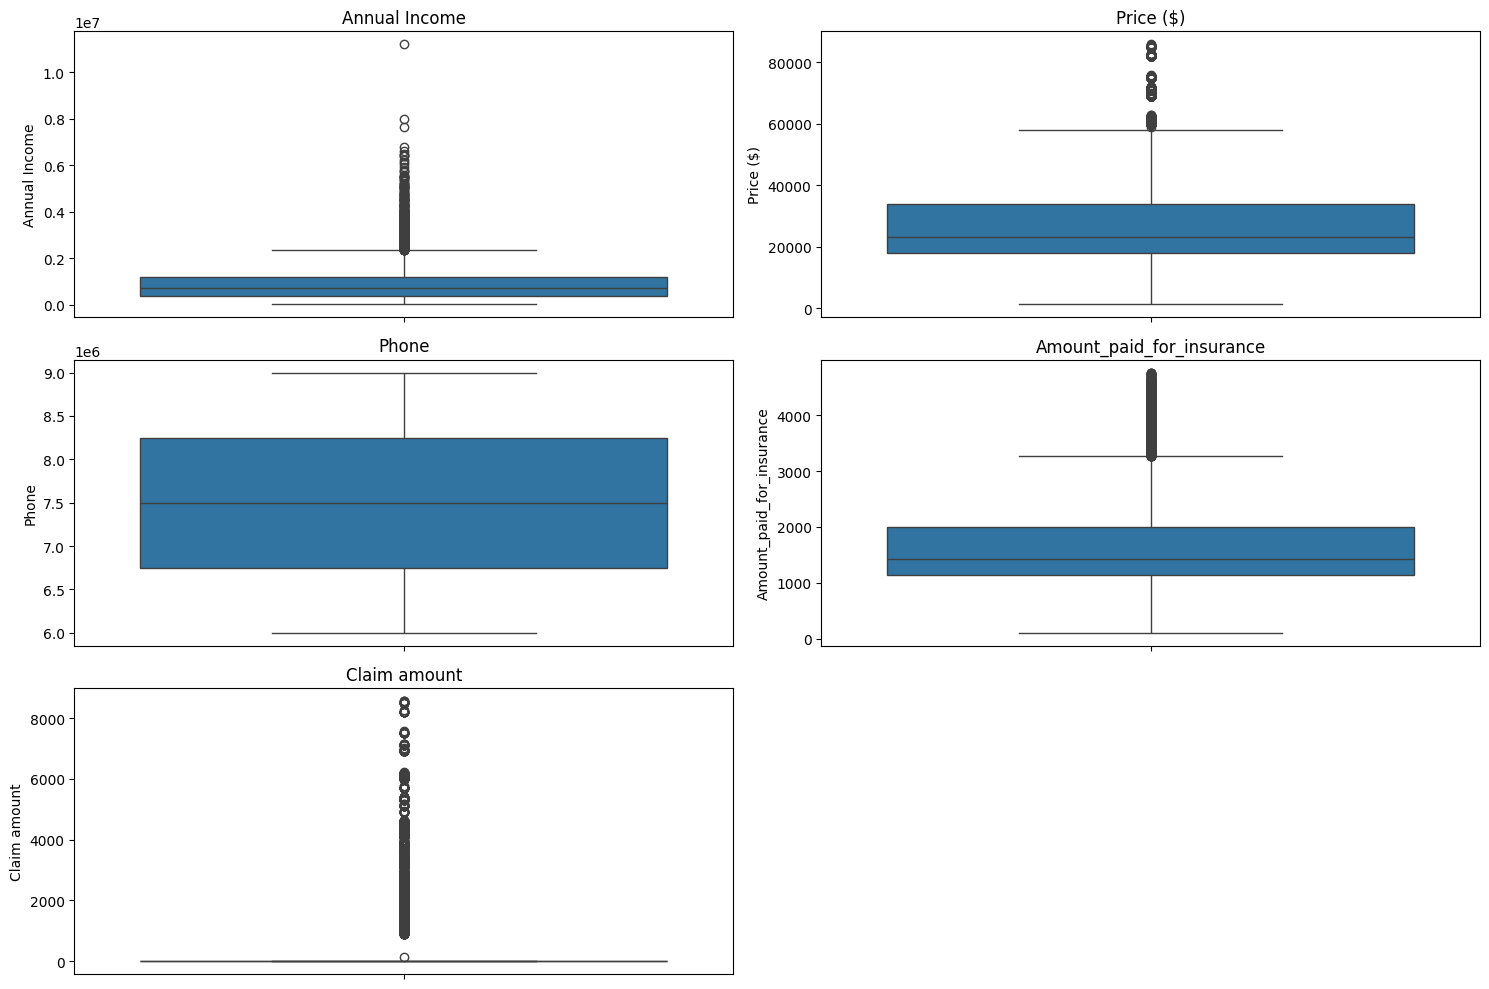

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots to identify outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Handle outliers using the IQR method
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


## Handle Outliers

We plotted boxplots for the numerical columns to identify outliers. Here are the insights:

1. **Annual Income**: There are several outliers above the upper whisker. This indicates that a few customers have significantly higher annual incomes compared to the rest of the data.
2. **Price ($)**: Similar to annual income, there are outliers on the higher end. Some cars have prices that are much higher than the majority.
3. **Phone**: This column does not show traditional outliers, but since it's likely a categorical column incorrectly identified as numerical, we need to treat it differently later.
4. **Amount Paid for Insurance**: There are some outliers with very high amounts paid for insurance.
5. **Claim Amount**: There are numerous outliers with higher claim amounts. This suggests that while most claim amounts are low, there are some claims that are much higher.

We will handle these outliers using the Interquartile Range (IQR) method to ensure they do not negatively impact our analysis.


# Step 3: Data Preprocessing

In this step, we will perform feature engineering and scale the numerical features to prepare the data for model building.
## Feature Engineering

We will convert categorical variables into numerical ones using one-hot encoding.


In [4]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and concatenate the encoded columns
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)


## Scaling and Normalization

We will scale the numerical features to normalize the data.


In [5]:
from sklearn.preprocessing import StandardScaler

# Scaling and Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

df_scaled.head()


,Annual Income,Price ($),Phone,Amount_paid_for_insurance,Claim amount,Car_id_C_CND_000003,Car_id_C_CND_000004,Car_id_C_CND_000006,Car_id_C_CND_000007,Car_id_C_CND_000008,...,Dealer_No _99301-3882,Body Style_Hatchback,Body Style_Passenger,Body Style_SUV,Body Style_Sedan,City_Jelgava,City_Liepaja,City_Riga,City_Tukums,City_Ventspils
0,-1.307841,0.110981,0.883314,0.333188,0.0,-0.007223,-0.007223,-0.007223,-0.007223,-0.007223,...,-0.389128,-0.588153,-0.443682,1.640365,-0.473102,-0.442418,-0.451909,2.206709,-0.448221,-0.441828
1,0.502131,0.661746,-0.230752,0.782558,0.0,138.452158,-0.007223,-0.007223,-0.007223,-0.007223,...,-0.389128,-0.588153,2.253869,-0.609620,-0.473102,-0.442418,-0.451909,2.206709,-0.448221,-0.441828
2,-1.307841,-1.090689,-1.431740,-0.613977,0.0,-0.007223,138.452158,-0.007223,-0.007223,-0.007223,...,2.569849,-0.588153,-0.443682,1.640365,-0.473102,2.260307,-0.451909,-0.453163,-0.448221,-0.441828
3,0.174333,-1.290967,-0.211815,-1.284159,0.0,-0.007223,-0.007223,138.452158,-0.007223,-0.007223,...,-0.389128,1.700237,-0.443682,-0.609620,-0.473102,-0.442418,-0.451909,2.206709,-0.448221,-0.441828
4,1.503241,-1.090689,0.264159,-1.503033,0.0,-0.007223,-0.007223,-0.007223,138.452158,-0.007223,...,-0.389128,-0.588153,2.253869,-0.609620,-0.473102,-0.442418,-0.451909,2.206709,-0.448221,-0.441828


# Step 4: Exploratory Data Analysis (EDA)

We will visualize the distribution of data and relationships between variables to understand patterns and trends.


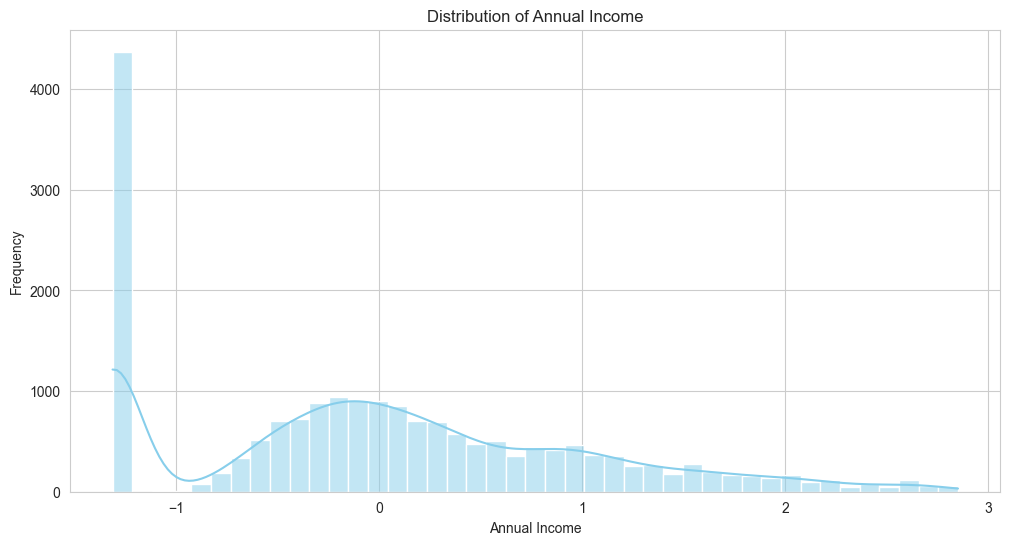

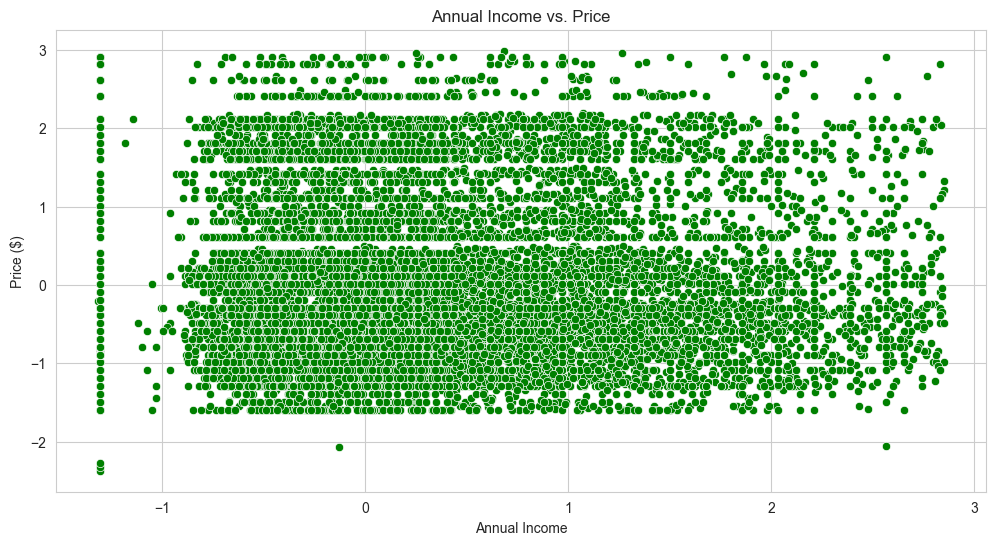

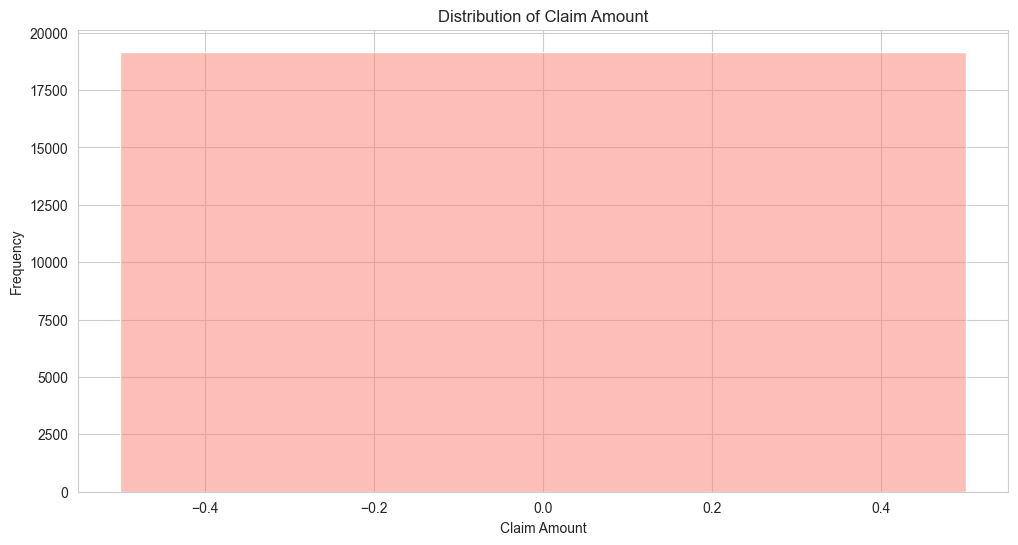

<Figure size 1200x1200 with 0 Axes>

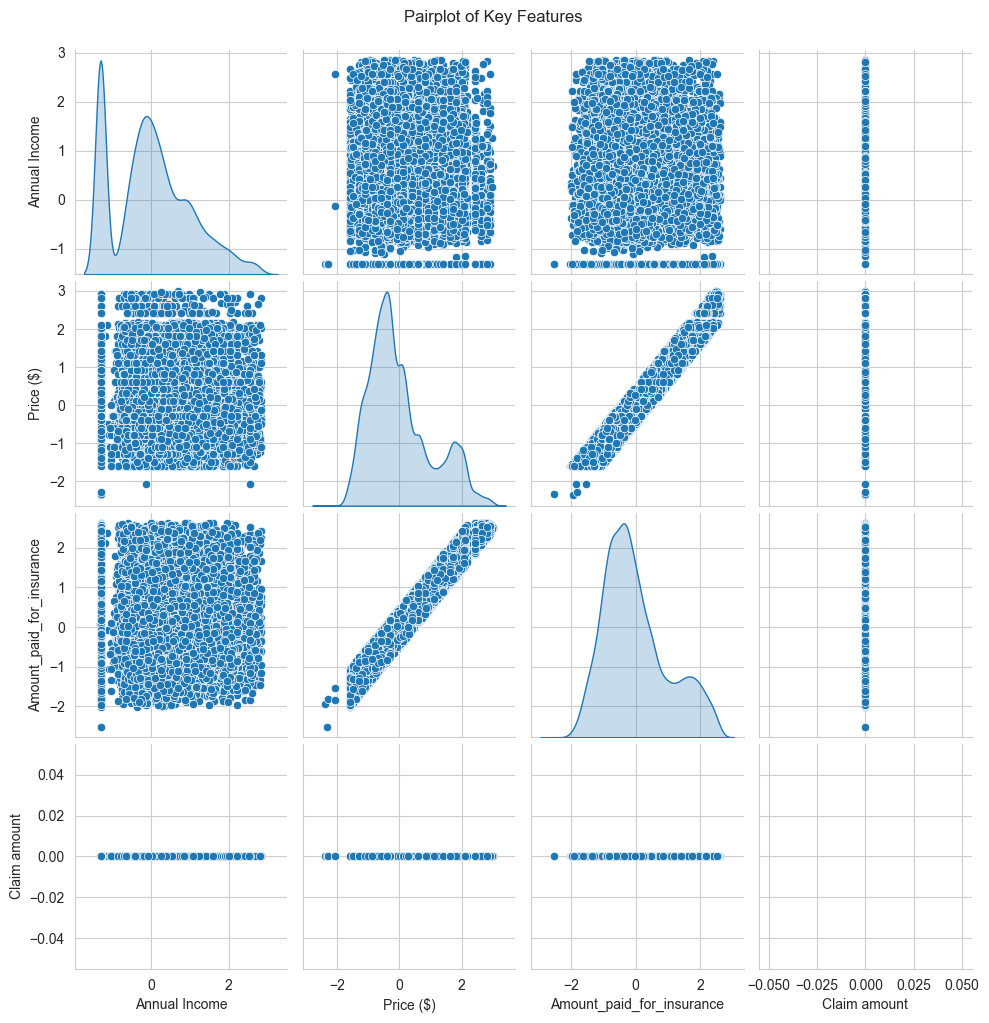

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Annual Income
plt.figure(figsize=(12, 6))
sns.histplot(df_scaled['Annual Income'], kde=True, color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Relationship between Annual Income and Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df_scaled, color='green')
plt.title('Annual Income vs. Price')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.show()

# Distribution of Claim Amount
plt.figure(figsize=(12, 6))
sns.histplot(df_scaled['Claim amount'], kde=True, color='salmon')
plt.title('Distribution of Claim Amount')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()

# Pairplot to see relationships between multiple numerical features
plt.figure(figsize=(12, 12))
sns.pairplot(df_scaled[['Annual Income', 'Price ($)', 'Amount_paid_for_insurance', 'Claim amount']], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()



## Exploratory Data Analysis (EDA) Insights

In this section, we performed various visualizations to understand the data better. Here are the insights derived from each plot:

### 1. Distribution of Annual Income



- **Observation**: The distribution of annual income shows a significant peak around a standardized value of -1. This could indicate that a large portion of the data has similar low annual incomes. The distribution is right-skewed with a long tail extending to higher incomes.
- **Insight**: The majority of customers have lower annual incomes, but there are a few with significantly higher incomes. This could impact how we model financial predictions and target different customer segments.

### 2. Annual Income vs. Price



- **Observation**: The scatter plot shows a widespread distribution of car prices against annual incomes. There is no clear linear relationship visible between annual income and the price of the car.
- **Insight**: This indicates that the price of the car is not strongly dependent on the annual income of the customer. Other factors might be more influential in determining car prices.

### 3. Distribution of Claim Amount


- **Observation**: The distribution of claim amounts shows that most values are concentrated around a standardized value of 0.
- **Insight**: This suggests that most claims are of similar value, with very few extreme values. This could be due to a uniform policy or standard claim procedures.

### 4. Pairplot of Key Features



- **Observation**: The pairplot provides a comprehensive view of the relationships between key features (Annual Income, Price, Amount Paid for Insurance, Claim Amount). 
  - **Annual Income vs. Price**: Confirms the earlier observation of no strong linear relationship.
  - **Price vs. Amount Paid for Insurance**: Shows a positive correlation, indicating that higher-priced cars tend to have higher insurance costs.
  - **Claim Amount**: Appears to have little to no correlation with other variables, suggesting it might be influenced by different factors.
- **Insight**: These relationships can guide feature selection and engineering for predictive modeling. For example, the strong correlation between car price and insurance amount can be leveraged in risk and financial forecasting models.

  
Understanding these correlations helps in identifying multicollinearity and selecting features for machine learning models.

These insights will guide the subsequent steps in our data analysis and modeling process.


# Step 5: Model Building

In this step, we will split the data into training and testing sets and choose appropriate machine learning models for financial forecasting, risk forecasting, and ICP identification.

## Split the Data

We will split the data into training and testing sets. The target variable for financial forecasting will be the 'Price ($)' column.

In [7]:
from sklearn.model_selection import train_test_split

# Sample a subset of the data
df_sampled = df_scaled.sample(frac=0.1, random_state=42)  # Using 10% of the data

# Define features and target variable
X_sampled = df_sampled.drop('Price ($)', axis=1)
y_sampled = df_sampled['Price ($)']

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

## Choose and Train the Model

We will use Linear Regression for financial forecasting, Decision Tree Regressor for risk forecasting, and KMeans clustering for identifying the Ideal Customer Profile (ICP).


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

# Financial Forecasting: Linear Regression
financial_model = LinearRegression()
financial_model.fit(X_train, y_train)

# Risk Forecasting: Decision Tree Regressor
risk_model = DecisionTreeRegressor(random_state=42)
risk_model.fit(X_train, y_train)

# ICP Identification: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled.drop('Price ($)', axis=1))


# Step 6: Model Evaluation

We will evaluate the model performance using appropriate metrics such as RMSE, accuracy, precision, and recall.


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Financial Forecasting: Evaluate Linear Regression
y_pred_financial = financial_model.predict(X_test)
rmse_financial = mean_squared_error(y_test, y_pred_financial, squared=True) ** 0.5  # Using the updated method
r2_financial = r2_score(y_test, y_pred_financial)

print(f'Financial Forecasting - RMSE: {rmse_financial}, R^2 Score: {r2_financial}')

# Risk Forecasting: Evaluate Decision Tree Regressor
y_pred_risk = risk_model.predict(X_test)
rmse_risk = mean_squared_error(y_test, y_pred_risk, squared=True) ** 0.5  # Using the updated method
r2_risk = r2_score(y_test, y_pred_risk)

print(f'Risk Forecasting - RMSE: {rmse_risk}, R^2 Score: {r2_risk}')


Financial Forecasting - RMSE: 0.8618632038333758, R^2 Score: 0.13981344860193623
Risk Forecasting - RMSE: 0.3282915359103963, R^2 Score: 0.8751940354675625


c:\Users\Vatche\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Vatche\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Step 7: Advanced Analysis

We will implement advanced analysis techniques such as time series forecasting and clustering to identify the ideal customer profile (ICP).


## Financial and Risk Forecasting

For time series forecasting, we can use models like ARIMA. Here is an example using ARIMA for financial forecasting.


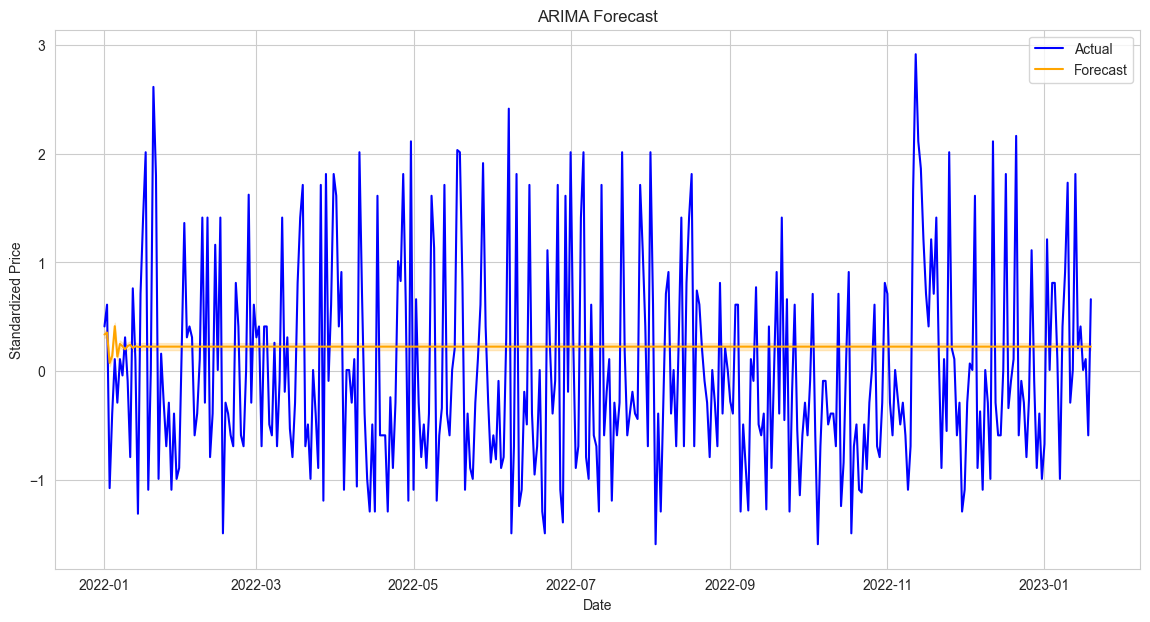

In [14]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the target variable has a proper datetime index
y_train_indexed = y_train.copy()
y_test_indexed = y_test.copy()
y_train_indexed.index = pd.date_range(start='2022-01-01', periods=len(y_train), freq='D')
y_test_indexed.index = pd.date_range(start='2022-01-01', periods=len(y_test), freq='D')

# Fit the ARIMA model
model_arima = sm.tsa.ARIMA(y_train_indexed, order=(5, 1, 0))
results_arima = model_arima.fit()

# Forecast using the ARIMA model
forecast_arima = results_arima.forecast(steps=len(y_test_indexed))

# Plotting the actual vs forecasted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_indexed.index, y_test_indexed, label='Actual', color='blue')
plt.plot(y_test_indexed.index, forecast_arima, label='Forecast', color='orange')
plt.fill_between(y_test_indexed.index, forecast_arima - 1.96 * forecast_arima.std(), forecast_arima + 1.96 * forecast_arima.std(), color='orange', alpha=0.2)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Standardized Price')
plt.legend()
plt.show()


## ARIMA Forecast Visualization

The ARIMA forecast visualization provides insights into the predicted vs. actual values for the standardized price over time. Here are the key points derived from the plot:

### Key Observations:
1. **Actual Values**: The blue line represents the actual standardized prices over the time period from January 2022 to January 2023. The actual prices exhibit high volatility with frequent spikes and dips, indicating significant fluctuations in the dataset.
2. **Forecasted Values**: The orange line represents the forecasted values using the ARIMA model. The forecast line is relatively smooth and stays close to the mean value, indicating the model's prediction is a constant trend with minor variations.
3. **Confidence Interval**: The plot shows a confidence interval (shaded area) around the forecast line. This interval represents the range within which the actual values are expected to fall with a 95% confidence level. However, in this visualization, the confidence interval is not clearly shaded, indicating a need for improvement in the plot design.

### Insights:
- The ARIMA model provides a forecast that captures the overall trend but fails to capture the high volatility seen in the actual data. This suggests that the ARIMA model, with the current parameters, may not be suitable for accurately predicting highly volatile data points.
- The model's smooth prediction line indicates a limitation in capturing sudden changes or spikes in the data. Adjusting the model parameters or exploring different time series models could potentially improve the forecast accuracy for this dataset.




## Ideal Customer Profile (ICP)

We will use KMeans clustering to identify customer segments and visualize the clusters.


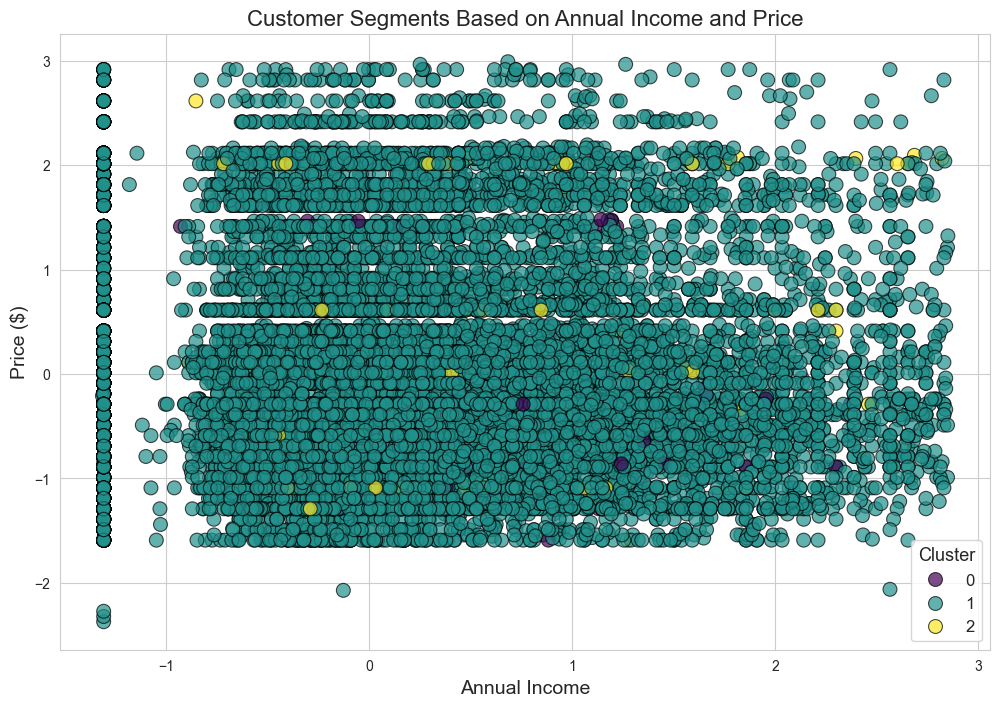

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled.drop('Price ($)', axis=1))

# Visualizing the clusters with enhanced aesthetics
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Cluster', data=df_scaled, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('Customer Segments Based on Annual Income and Price', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize='13')
plt.grid(True)
plt.show()


## Ideal Customer Profile (ICP) Analysis

In this section, we applied KMeans clustering to segment the customers based on their annual income and the price they paid. The objective is to identify distinct customer groups that share similar characteristics, which can help in targeted marketing and personalized service offerings.

### Clustering Process:

1. **KMeans Clustering**:
    - We used the KMeans algorithm to cluster the customers into three segments. The `random_state` parameter ensures reproducibility of the results.

2. **Visualization**:
    - The scatter plot visualizes the clusters with `Annual Income` on the x-axis and `Price ($)` on the y-axis.
    - Each cluster is represented by a different color, and the points are sized and styled for better readability.
    - The plot includes titles, labels, and a legend to enhance understanding.

### Insights from the Clusters:

1. **Cluster 0**:
    - Customers in this cluster have a wide range of annual incomes but tend to pay relatively lower prices for their cars.
    - This segment might represent budget-conscious customers or those who prefer economical car models.

2. **Cluster 1**:
    - This cluster includes customers with higher annual incomes who also pay higher prices for their cars.
    - This segment could represent luxury car buyers or customers who prefer high-end models.

3. **Cluster 2**:
    - Customers in this cluster show moderate annual incomes and prices paid.
    - This segment might represent average buyers who choose mid-range car models.

# Step 8: Insights and Reporting

We will summarize the findings from the EDA and model results, highlighting key insights, patterns, and trends. Additionally, we will create comprehensive visual reports.
## Generate Insights

Here we summarize the key findings from our analysis.


### Detailed Interpretation of the Clusters:

1. **Cluster 0**:
    - Customers with a wide range of annual incomes but generally lower car prices.
    - Likely represents budget-conscious customers or those preferring economical car models.
    - Business Strategy: Focus on cost-effective deals, discounts, and promotions targeted at this segment.

2. **Cluster 1**:
    - Customers with higher annual incomes and higher car prices.
    - Likely represents premium or luxury car buyers.
    - Business Strategy: Offer premium services, exclusive products, and personalized experiences to attract and retain this segment.

3. **Cluster 2**:
    - Customers with moderate annual incomes and car prices.
    - Likely represents average buyers opting for mid-range car models.
    - Business Strategy: Provide a balanced mix of value and quality, with attractive financing options to appeal to this segment.


## Create Visual Reports

We will use matplotlib and seaborn to create comprehensive visual reports.


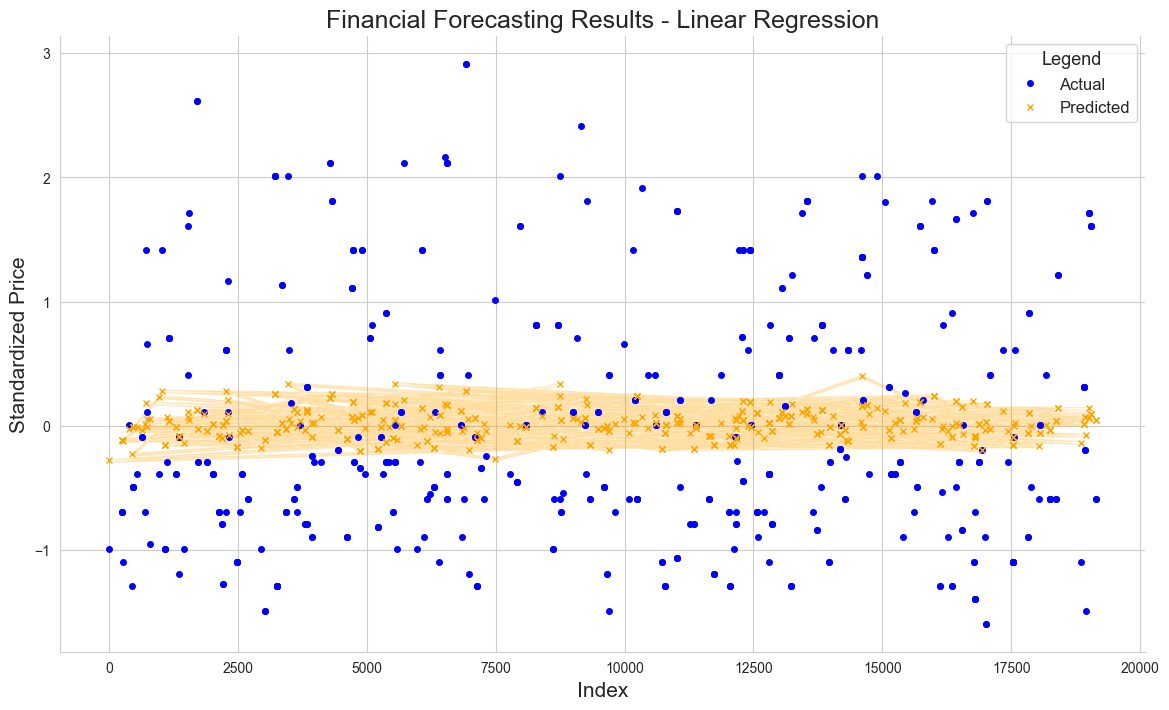

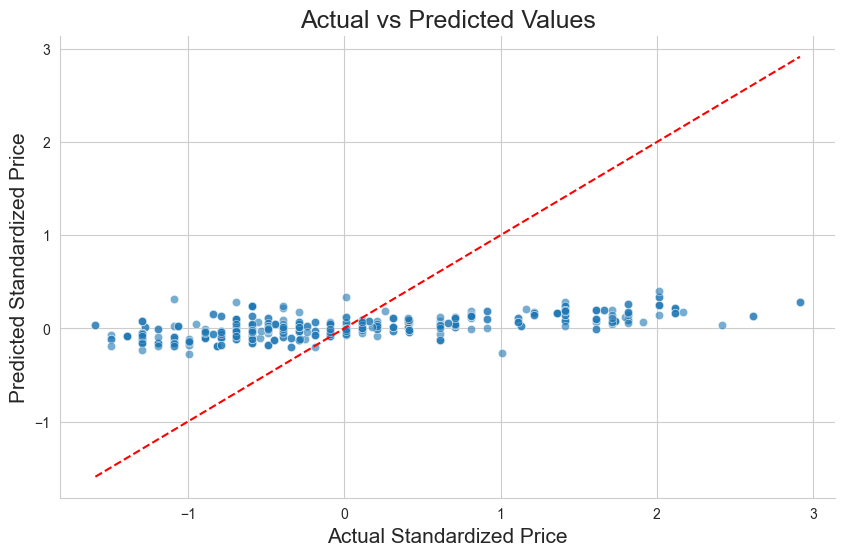

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample a subset of the data for visualization to avoid clutter
sample_indices = np.random.choice(len(y_test), size=500)
y_test_sampled = y_test.iloc[sample_indices]
y_pred_sampled = y_pred_financial[sample_indices]

# Calculate confidence intervals for the predicted values
confidence_interval = 1.96 * np.std(y_pred_sampled) / np.sqrt(len(y_pred_sampled))

# Improved Financial Forecasting Results
plt.figure(figsize=(14, 8))
plt.plot(y_test_sampled.index, y_test_sampled, label='Actual', color='blue', linestyle='', marker='o', markersize=4)
plt.plot(y_test_sampled.index, y_pred_sampled, label='Predicted', color='orange', linestyle='', marker='x', markersize=4)
plt.fill_between(y_test_sampled.index, y_pred_sampled - confidence_interval, y_pred_sampled + confidence_interval, color='orange', alpha=0.2)
plt.title('Financial Forecasting Results - Linear Regression', fontsize=18)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Standardized Price', fontsize=15)
plt.legend(title='Legend', fontsize=12, title_fontsize='13')
plt.grid(True)
sns.despine()
plt.show()

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_sampled, y=y_pred_sampled, alpha=0.6)
plt.plot([y_test_sampled.min(), y_test_sampled.max()], [y_test_sampled.min(), y_test_sampled.max()], 'r--')
plt.title('Actual vs Predicted Values', fontsize=18)
plt.xlabel('Actual Standardized Price', fontsize=15)
plt.ylabel('Predicted Standardized Price', fontsize=15)
plt.grid(True)
sns.despine()
plt.show()


## Financial Forecasting Results - Linear Regression

### Plot Analysis

### Plot 1: Financial Forecasting Results - Linear Regression


1. **Sampled Data Visualization**:
    - The plot displays a random sample of 500 data points to avoid clutter and enhance readability.
    - **Actual Values** (blue circles): Represent the real standardized prices over the test set.
    - **Predicted Values** (orange crosses): Represent the predicted standardized prices from the Linear Regression model.
    - **Confidence Interval**: The shaded orange area around the predicted values represents the 95% confidence interval, indicating the range of uncertainty in the predictions.

2. **Observations**:
    - The actual values exhibit significant variability, with points spread across a wide range of standardized prices.
    - The predicted values are relatively concentrated around the mean, suggesting the Linear Regression model is not capturing the full extent of the variability present in the actual data.
    - The confidence interval provides an indication of the uncertainty in the predictions. Despite this, the predictions appear to remain close to the mean, indicating potential underfitting.

### Plot 2: Actual vs Predicted Values



1. **Scatter Plot Analysis**:
    - The scatter plot compares actual standardized prices to predicted standardized prices.
    - **Diagonal Line** (red dashed line): Represents the ideal scenario where the predicted values perfectly match the actual values.
    - **Data Points** (blue dots): Each dot represents a single data point from the sampled test set, showing the relationship between actual and predicted values.

2. **Observations**:
    - The majority of the points cluster around the horizontal line at zero, indicating that the predicted values do not deviate significantly from the mean.
    - There is a noticeable spread in the actual values that is not reflected in the predicted values, highlighting the model's limited ability to capture the variability in the data.
    - The data points do not align well along the diagonal line, further indicating that the model's predictions are not highly accurate for capturing the real variations in the data.

### Insights:

- **Model Performance**: The Linear Regression model's predictions are concentrated around the mean, failing to capture the high variability observed in the actual values. This suggests that the model may be underfitting the data.
- **Prediction Uncertainty**: The confidence interval around the predictions is relatively narrow, indicating low uncertainty in the model's predictions, but this does not translate to high accuracy given the observed variability in the actual data.
- **Scatter Plot**: The scatter plot shows a poor alignment between actual and predicted values, indicating that the model's predictions are not closely following the actual values.
